In [0]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

fatal: destination path 'PlantVillage-Dataset' already exists and is not an empty directory.


In [0]:
!ls PlantVillage-Dataset/raw/color

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato_

In [0]:
from tensorflow import keras 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt



In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation , Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import os 
os.listdir('PlantVillage-Dataset/raw/color')


['Strawberry___healthy',
 'Squash___Powdery_mildew',
 'Tomato___healthy',
 'Peach___healthy',
 'Grape___Esca_(Black_Measles)',
 'Pepper,_bell___Bacterial_spot',
 'Peach___Bacterial_spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Apple___Black_rot',
 'Tomato___Leaf_Mold',
 'Apple___healthy',
 'Pepper,_bell___healthy',
 'Tomato___Early_blight',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___Common_rust_',
 'Soybean___healthy',
 'Blueberry___healthy',
 'Strawberry___Leaf_scorch',
 'Raspberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Grape___healthy',
 'Tomato___Septoria_leaf_spot',
 'Potato___Early_blight',
 'Tomato___Late_blight',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Potato___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Apple___Cedar_apple

In [0]:
train_datagen = ImageDataGenerator(validation_split = 0.2,
                                rotation_range = 20.,
                                width_shift_range = 2.,
                                height_shift_range = 2.,
                                #brightness_range = (0 ,100),
                                shear_range = 20. ,
                                zoom_range = (1, 2),
                                rescale = 1./255,
                                vertical_flip = True,
                                horizontal_flip = True,
                                fill_mode = 'nearest'
                                #featurewise_center = True,
                                #featurewise_std_normalization = True

                                ) 

In [0]:
train_path = 'PlantVillage-Dataset/raw/color'
test_path = 'images/test/'
batch_size = 64
image_size = 224
num_class = 38
target_size = (image_size,image_size)

In [0]:
train_data_generator = train_datagen.flow_from_directory(directory = train_path 
                                                         ,batch_size = batch_size 
                                                         ,target_size= target_size,
                                                         subset = "training",
                                                         shuffle = True)

Found 43456 images belonging to 38 classes.


In [0]:
validation_data_generator = train_datagen.flow_from_directory(directory = train_path,
                                                              batch_size = batch_size,
                                                              target_size = target_size,
                                                              shuffle = True,
                                                              subset = 'validation')

Found 10849 images belonging to 38 classes.


In [0]:
model = train_datagen.flow_from_directory(directory = train_path ,
                                          batch_size = batch_size,
                                          target_size = target_size)

Found 54305 images belonging to 38 classes.


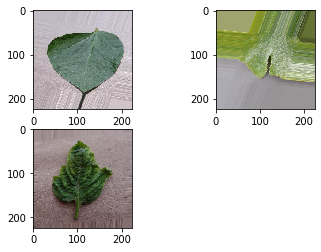

In [0]:
x_batch , _ = train_data_generator.next()
fig = plt.figure()
rows = 2 
columns = 2

for i in range(1,columns*rows):
  num = np.random.randint(batch_size)
  image = x_batch[num].astype(np.float)
  fig.add_subplot(rows,columns,i)
  plt.imshow(image)

In [0]:
p = []
for i in range(num_class):
  p.append(list(train_data_generator.labels).count(i))
  print(str(i)+":"+str(p[i]))

0:504
1:497
2:220
3:1316
4:1202
5:842
6:684
7:411
8:954
9:788
10:930
11:944
12:1107
13:861
14:339
15:4406
16:1838
17:288
18:798
19:1183
20:800
21:800
22:122
23:297
24:4072
25:1468
26:888
27:365
28:1702
29:800
30:1528
31:762
32:1417
33:1341
34:1124
35:4286
36:299
37:1273


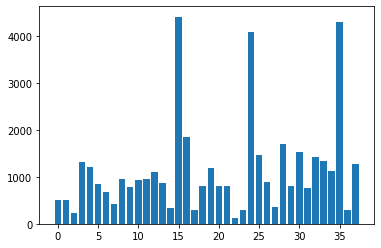

In [0]:
index = p
plt.bar(range(num_class),index)
plt.show()

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
import tensorflow.keras
from tensorflow.keras.models import Model , load_model 
#from tensorflow.keras.layers import Activation , Dropout, Flatten, Dense
from tensorflow.keras.applications.densenet import DenseNet121
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout,Activation,Flatten



In [0]:
basic_model = DenseNet121(
                          weights = 'imagenet',
                          pooling = (2,2),
                          ) 

In [0]:
x_batch , y_batch = train_data_generator.next()

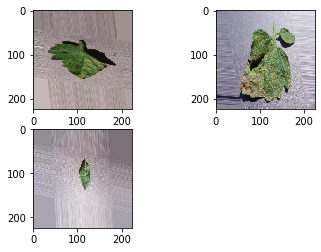

In [0]:
fig = plt.figure()
column = 2 
row = 5 
for i in range (1,columns*rows):
  num = np.random.randint(batch_size)
  image = x_batch[num].astype(np.float)
  fig.add_subplot(rows,columns,i)
  plt.imshow(image)

In [0]:
print(basic_model.summary())

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [0]:
from tensorflow.keras import losses
model = tf.keras.models.Sequential()

model.add(basic_model)

model.add(Flatten())
model.add(Dense(1024,activation = 'relu'))
model.add(Dense(num_class,activation = 'relu'))
model.add(Dense(num_class , activation = 'softmax'))

print (model.summary())

model.compile(loss = losses.categorical_crossentropy, optimizer = 'adam', metrics = ['accuracy'])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1000)              8062504   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1025024   
_________________________________________________________________
dense_4 (Dense)              (None, 38)                38950     
_________________________________________________________________
dense_5 (Dense)              (None, 38)                1482      
Total params: 9,127,960
Trainable params: 9,044,312
Non-trainable params: 83,648
_________________________________________________________________
None


In [0]:
model.fit_generator(
                    train_data_generator,
                    steps_per_epoch = train_data_generator.samples//batch_size,
                    validation_data = validation_data_generator,
                    validation_steps = validation_data_generator.samples//batch_size,
                    epochs=40
                    )

Epoch 1/40
679/679 [==============================] - 876s 1s/step - loss: 1.6811 - acc: 0.5097 - val_loss: 1.9791 - val_acc: 0.5289
Epoch 2/40
679/679 [==============================] - 923s 1s/step - loss: 0.6365 - acc: 0.7977 - val_loss: 0.9113 - val_acc: 0.7528
Epoch 3/40
679/679 [==============================] - 919s 1s/step - loss: 0.3319 - acc: 0.8998 - val_loss: 0.7257 - val_acc: 0.7822
Epoch 4/40
679/679 [==============================] - 911s 1s/step - loss: 0.2529 - acc: 0.9249 - val_loss: 2.2872 - val_acc: 0.6191
Epoch 5/40
679/679 [==============================] - 933s 1s/step - loss: 0.1911 - acc: 0.9430 - val_loss: 0.9635 - val_acc: 0.7885
Epoch 6/40
679/679 [==============================] - 854s 1s/step - loss: 0.1511 - acc: 0.9563 - val_loss: 0.3206 - val_acc: 0.9056
Epoch 7/40
679/679 [==============================] - 835s 1s/step - loss: 0.1275 - acc: 0.9622 - val_loss: 0.1991 - val_acc: 0.9428
Epoch 8/40
679/679 [==============================] - 825s 1s/step - 

In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()


model.save('standard_densenet_model.h5')
print("Model_saved")

get_ipython().system('conda install h5py')

model.metrics[1]

FailedPreconditionError: ignored

In [0]:
model.evaluate(validation_data_generator)

NameError: ignored